In [27]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import pylab as pl
from astropy import visualization, coordinates, units as u
from astroquery.vizier import Vizier
from photutils import DAOStarFinder
from astropy.wcs.utils import fit_wcs_from_points
import glob
import os

from wcsFunction import findwcs

In [28]:
cd /orange/adamginsburg/w51/gtc/GTC2-20AFLO/OB0001/object

/orange/adamginsburg/w51/gtc/GTC2-20AFLO/OB0001/object


In [29]:
files = [x for x in glob.glob("*.fits") if "STARE" in x]

In [30]:
len(files)

182

In [35]:
path = '/orange/adamginsburg/w51/gtc/parker/wcsCorrectedImages1'

In [37]:
for filename in files:
    
    filehandle = fits.open(filename)
    filename_nosuffix = os.path.splitext(filename)[0]
    new_filename = f'{path}/{filename_nosuffix}_wcs_corrected.fits'
    
    new_wcs, starcat, table_coordinates = findwcs(filehandle)
    
    filehandle[0].header.update(new_wcs.to_header(relax=True))
    filehandle.writeto(f'{new_filename}')

In [4]:
cd /orange/adamginsburg/w51/gtc/parker/ReprojectedImages

/orange/adamginsburg/w51/gtc/parker/ReprojectedImages


In [5]:
files = !ls *fits

In [9]:
file1 = fits.open(files[0])
file1

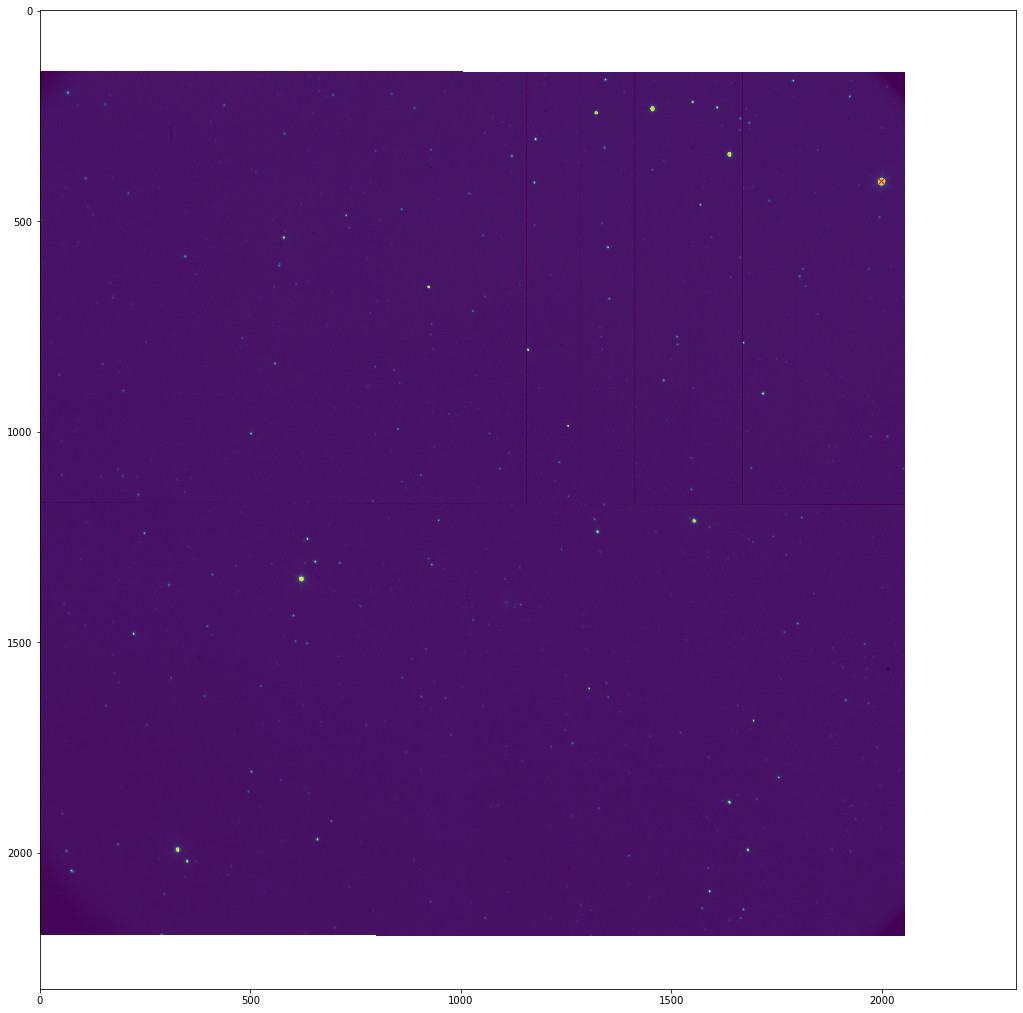

In [24]:
pl.figure(figsize=(18,18))
pl.imshow(file1[0].data)
pl.plot(1998,405, 'rx')

In [25]:
file2 = fits.open(files[1])

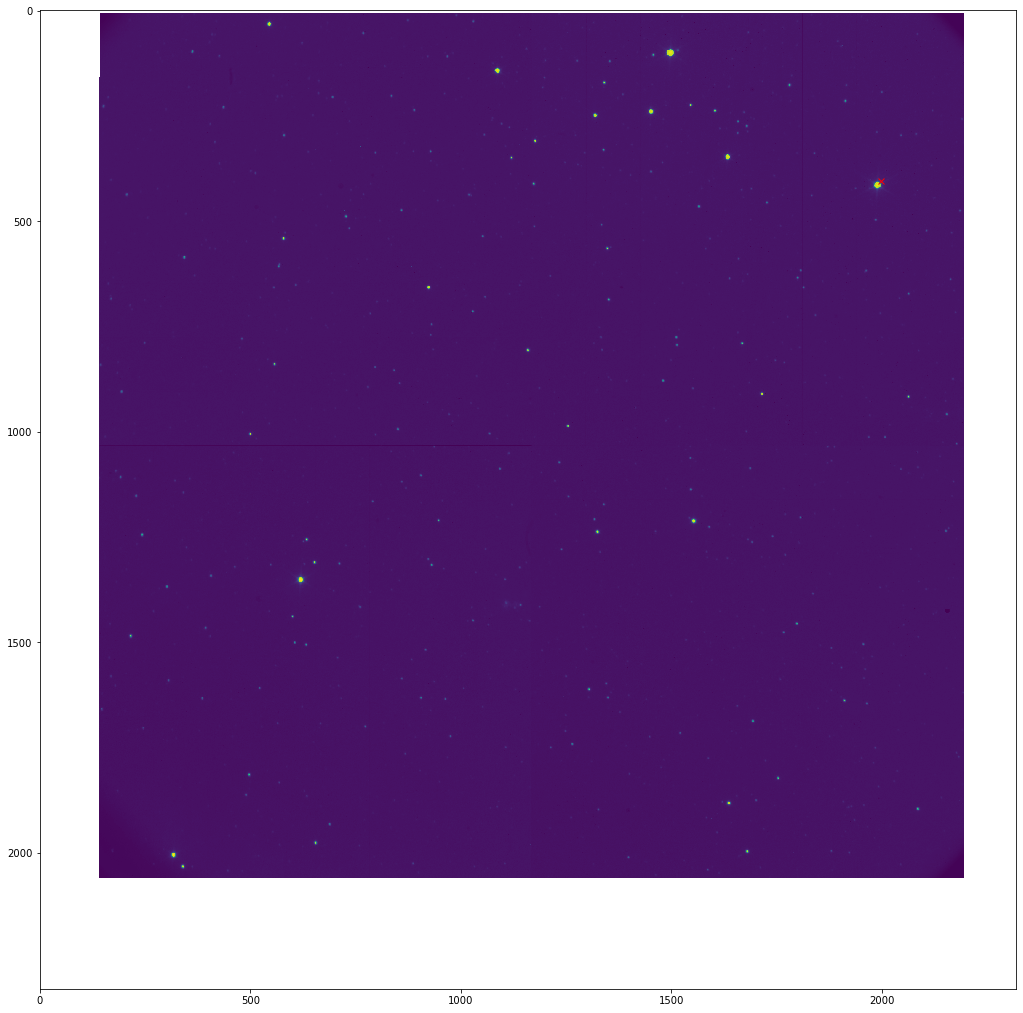

In [26]:
pl.figure(figsize=(18,18))
pl.imshow(file2[0].data)
pl.plot(1998,405, 'rx')